In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
import numpy as np

In [2]:
#definindo os diretórios

main_dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images'

pleasant_dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant'
pleasant_p1dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+1'
pleasant_p2dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+2'
pleasant_p3dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+3'
pleasant_p4dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+4'
pleasant_p5dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+5'
pleasant_n1dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-1'
pleasant_n2dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-2'
pleasant_n3dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-3'
pleasant_n4dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-4'
pleasant_n5dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-5'

unpleasant_dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant'
unpleasant_p1dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant+1'
unpleasant_p2dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant+2'
unpleasant_p3dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant+3'
unpleasant_p4dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant+4'
unpleasant_p5dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant+5'
unpleasant_n1dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant-1'
unpleasant_n2dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant-2'
unpleasant_n3dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant-3'
unpleasant_n4dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant-4'
unpleasant_n5dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Unpleasant-5'

In [3]:
def complexity_ratio(img_path, compressed_img_path):
    
    image = Image.open(img_path)
    
    image.save(compressed_img_path, optimize=True, quality=95)
    
    compressed_size = os.path.getsize(compressed_img_path)

    return (round((compressed_size/(512*512*3))*100, 2))

In [4]:
images_path = []
images_weight = []
images_comp_ratio = []
images_seed = []

images_path_u = []
images_weight_u = []
images_comp_ratio_u = []
images_seed_u = []

def import_images(directory, dir_type):
    
    compressed_dir = os.path.join(main_dir, 'compressed')
    if not os.path.exists(compressed_dir):
        os.makedirs(compressed_dir)
    
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                img_path = os.path.join(root, file)

                compressed_img_path = os.path.join(compressed_dir, f"compressed_{file}")
                comp_ratio = complexity_ratio(img_path, compressed_img_path)
                
                match_seed = re.search(r'S(\d+)', file)
                match_p = re.search(r'leasant\+(\d+)', directory)
                match_n = re.search(r'leasant-(\d+)', directory)

                if dir_type == 'pleasant':
                    if match_p:
                        images_weight.append(int(match_p.group(1)))       
                    elif match_n:
                        images_weight.append(int(match_n.group(1)) * -1)                  
                    else:
                        images_weight.append(0)
                    
                    images_comp_ratio.append(comp_ratio)
                    images_path.append(img_path)
                    images_seed.append(int(match_seed.group(1)) if match_seed else 0)
                else:
                    if match_p:
                        images_weight_u.append(int(match_p.group(1)))       
                    elif match_n:
                        images_weight_u.append(int(match_n.group(1)) * -1)                  
                    else:
                        images_weight_u.append(0)
                    
                    images_comp_ratio_u.append(comp_ratio)
                    images_path_u.append(img_path)
                    images_seed_u.append(int(match_seed.group(1)) if match_seed else 0)


pleasant_dirs = [pleasant_dir, pleasant_p1dir, pleasant_p2dir, pleasant_p3dir, pleasant_p4dir, pleasant_p5dir,
                 pleasant_n1dir, pleasant_n2dir, pleasant_n3dir, pleasant_n4dir, pleasant_n5dir]

unpleasant_dirs = [unpleasant_dir, unpleasant_p1dir, unpleasant_p2dir, unpleasant_p3dir, unpleasant_p4dir, unpleasant_p5dir,
                   unpleasant_n1dir, unpleasant_n2dir, unpleasant_n3dir, unpleasant_n4dir, unpleasant_n5dir]

for dir in pleasant_dirs:
    import_images(dir, 'pleasant')

for dir in unpleasant_dirs:
    import_images(dir, 'unpleasant')

# Dataframe Pleasant
df = pd.DataFrame({'path': images_path, 'weight': images_weight, 'complexity': images_comp_ratio, 'seed': images_seed})
df = df.sort_values(by=['weight'])
df.reset_index(drop=True, inplace=True)
print(df.head(12))
df.to_csv('pleasant.csv', index=False)

# Dataframe Unpleasant
df2 = pd.DataFrame({'path': images_path_u, 'weight': images_weight_u, 'complexity': images_comp_ratio_u, 'seed': images_seed_u})
df2 = df2.sort_values(by=['weight'])
df2.reset_index(drop=True, inplace=True)
print(df2.head(12))
df2.to_csv('unpleasant.csv', index=False)

                                                 path  weight  complexity  \
0   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       62.96   
1   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       63.58   
2   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       56.84   
3   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       46.07   
4   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       46.32   
5   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       60.44   
6   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       71.73   
7   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       64.94   
8   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       54.45   
9   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       56.51   
10  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       56.44   
11  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       53.80   

In [14]:
'''
plt.figure(figsize=(10, 6))
df.boxplot(column='complexity', by='weight', grid=False, vert=True)
plt.title('')
plt.suptitle('')
plt.xlabel('Peso')
plt.ylabel('Complexidade (%)')
plt.xticks(rotation=45)
plt.savefig('complexity_by_weight.png', dpi=300)
plt.show()
'''

"\nplt.figure(figsize=(10, 6))\ndf.boxplot(column='complexity', by='weight', grid=False, vert=True)\nplt.title('')\nplt.suptitle('')\nplt.xlabel('Peso')\nplt.ylabel('Complexidade (%)')\nplt.xticks(rotation=45)\nplt.savefig('complexity_by_weight.png', dpi=300)\nplt.show()\n"

In [21]:
df_stats = df.groupby('weight')['complexity'].agg(['mean', 'std']).reset_index()
print(df_stats.head(12))

df2_stats = df2.groupby('weight')['complexity'].agg(['mean', 'std']).reset_index()
print(df2_stats.head(12))

'''
mean = média
std = desvio padrão
'''

    weight    mean       std
0       -5  58.384  8.109042
1       -4  57.177  7.251788
2       -3  57.136  7.799438
3       -2  55.940  7.172260
4       -1  54.987  6.912625
5        0  54.981  7.304570
6        1  55.147  7.373745
7        2  55.348  7.539232
8        3  55.323  7.764090
9        4  55.725  7.648560
10       5  55.952  6.958025
    weight    mean        std
0       -5  60.598   9.795229
1       -4  60.333   9.928840
2       -3  59.945  10.035171
3       -2  59.556  10.133249
4       -1  58.314   9.406870
5        0  54.353   8.293558
6        1  54.269   8.100083
7        2  54.222   7.860167
8        3  54.188   8.055973
9        4  54.173   8.122557
10       5  54.245   8.824188


'\nmean = média\nstd = desvio padrão\n'

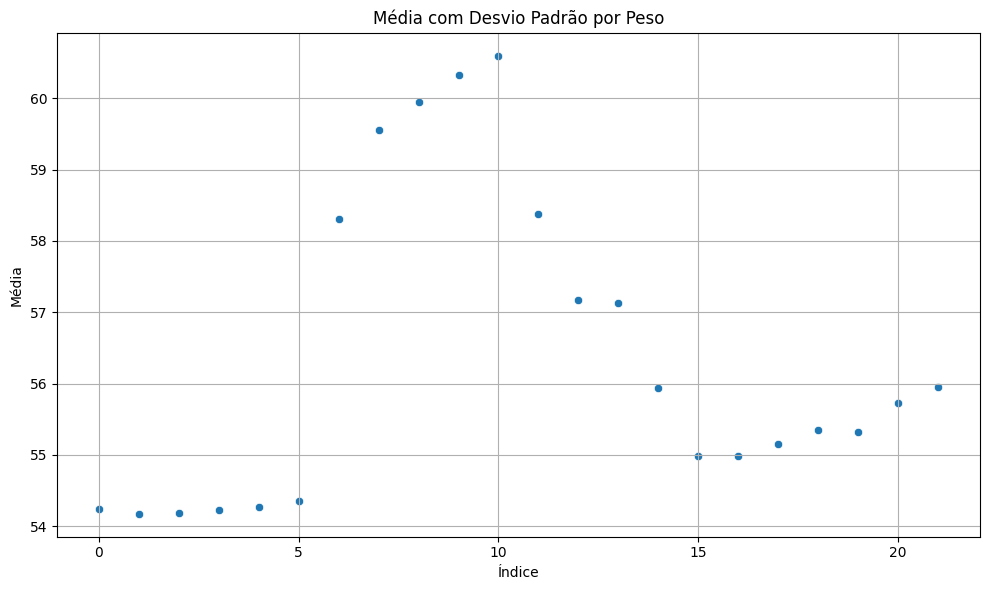

In [74]:
df2_stats = df2_stats.sort_values(by='weight', ascending=False)

df3 = pd.concat([df2_stats, df_stats], ignore_index=True)
df3['weight'] = df3['weight'].astype(str)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x=df3.index, y='mean')
plt.title('Média com Desvio Padrão por Peso')
plt.xlabel('Índice')
plt.ylabel('Média')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
#diff = complexity_weight_0 - complexity_weight_x p/ seed

diff_comp = []
diff_comp2 = []

df_t = df.sort_values(by=['weight', 'seed'])
df_0 = df[['seed', 'weight', 'complexity']]
df_0 = df_0[df_0['weight'] == 0]

df2_t = df2.sort_values(by=['weight', 'seed'])
df2_0 = df2[['seed', 'weight', 'complexity']]
df2_0 = df2_0[df2_0['weight'] == 0]

for index, row in df_t.iterrows():
    seed = row['seed']
    comp = row['complexity']
    
    if seed in df_0['seed'].values:
        complexity_value = df_0.loc[df_0['seed'] == seed, 'complexity'].values[0]
        diff_comp.append(comp - complexity_value)

for index, row in df2_t.iterrows():
    seed = row['seed']
    comp = row['complexity']
    
    if seed in df2_0['seed'].values:
        complexity_value = df2_0.loc[df2_0['seed'] == seed, 'complexity'].values[0]
        diff_comp2.append(comp - complexity_value)

df_t['diff'] = diff_comp
df2_t['diff'] = diff_comp2

print(df_t.head())
print(df_0.head())

print(df2_t.head())
print(df2_0.head())
#diffs = df.groupby('seed')['diff'].agg(['mean', 'std']).reset_index()
#print(df_stats)

'''
mean = média
std = desvio padrão
'''

                                                path  weight  complexity  \
0  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       62.96   
1  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       63.58   
9  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       56.51   
3  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       46.07   
2  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       56.84   

        seed  diff  
0  235711120  2.44  
1  235711121  1.23  
9  235711122  5.64  
3  235711123 -0.27  
2  235711124  2.10  
         seed  weight  complexity
50  235711121       0       62.35
51  235711120       0       60.52
52  235711122       0       50.87
53  235711128       0       61.73
54  235711125       0       63.08
                                                path  weight  complexity  \
1  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       59.25   
7  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5 

'\nmean = média\nstd = desvio padrão\n'

/tmp/ipykernel_10089/3531117244.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=median_diff, x='weight', y='median_diff', palette='viridis', ax=axs[1])


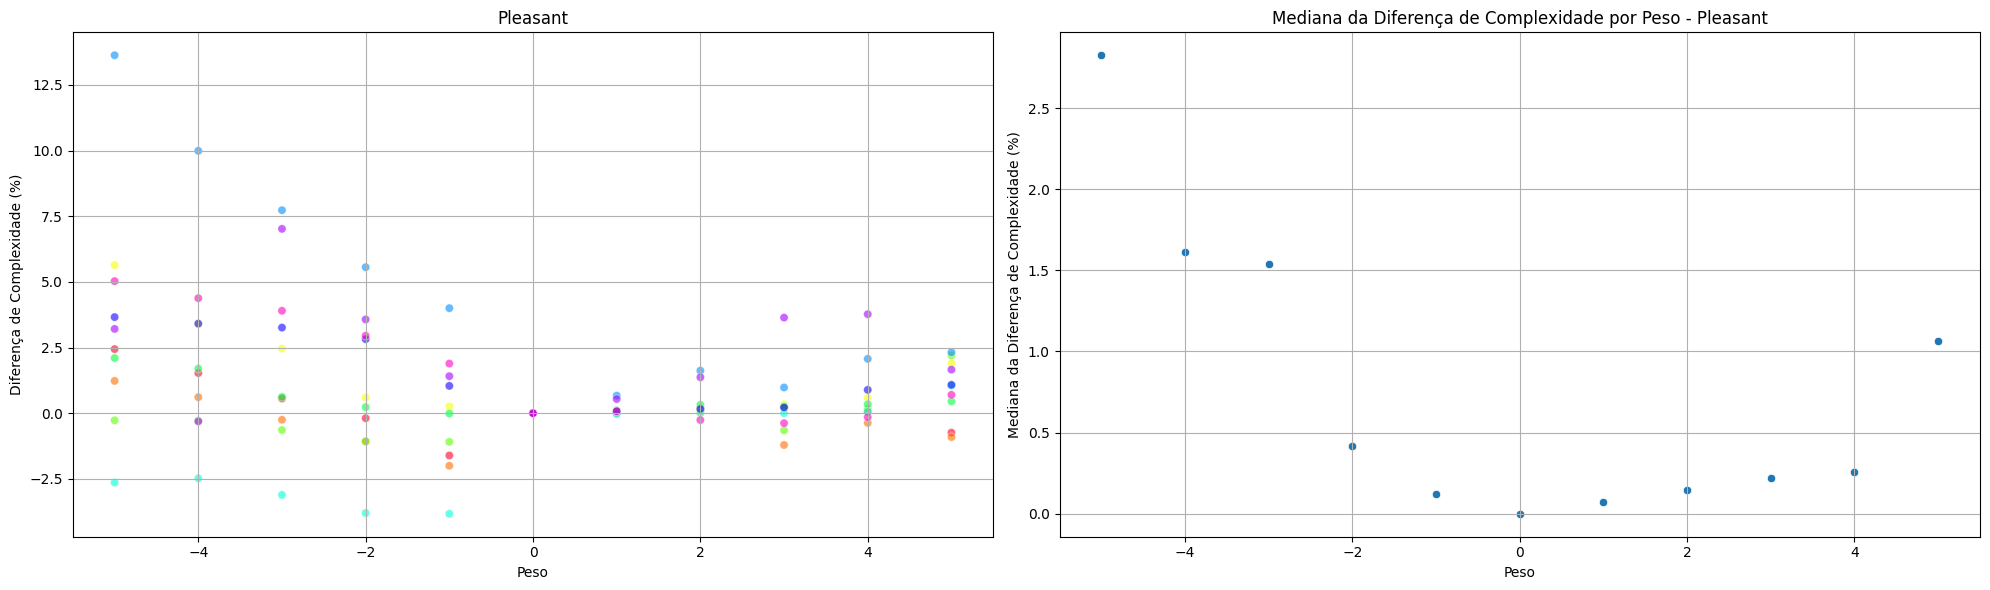

    weight  median_diff
0       -5        2.825
1       -4        1.615
2       -3        1.540
3       -2        0.415
4       -1        0.125
5        0        0.000
6        1        0.075
7        2        0.145
8        3        0.220
9        4        0.255
10       5        1.065


In [10]:
median_diff = df_t.groupby('weight')['diff'].median().reset_index()
median_diff.columns = ['weight', 'median_diff']

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=df_t, x='weight', y='diff', hue='seed', alpha=0.6, palette='gist_rainbow', ax=axs[0], legend=False)
axs[0].set_title('Pleasant')
axs[0].set_xlabel('Peso')
axs[0].set_ylabel('Diferença de Complexidade (%)')
axs[0].grid(True)

sns.scatterplot(data=median_diff, x='weight', y='median_diff', palette='viridis', ax=axs[1])
axs[1].set_title('Mediana da Diferença de Complexidade por Peso - Pleasant')
axs[1].set_xlabel('Peso')
axs[1].set_ylabel('Mediana da Diferença de Complexidade (%)')
axs[1].grid(True)

plt.tight_layout()

plt.savefig('combined_plot.png', dpi=300)
plt.show()

print(median_diff)

/tmp/ipykernel_10089/1732354393.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=median_diff, x='weight', y='median_diff', palette='viridis', ax=axs[1])


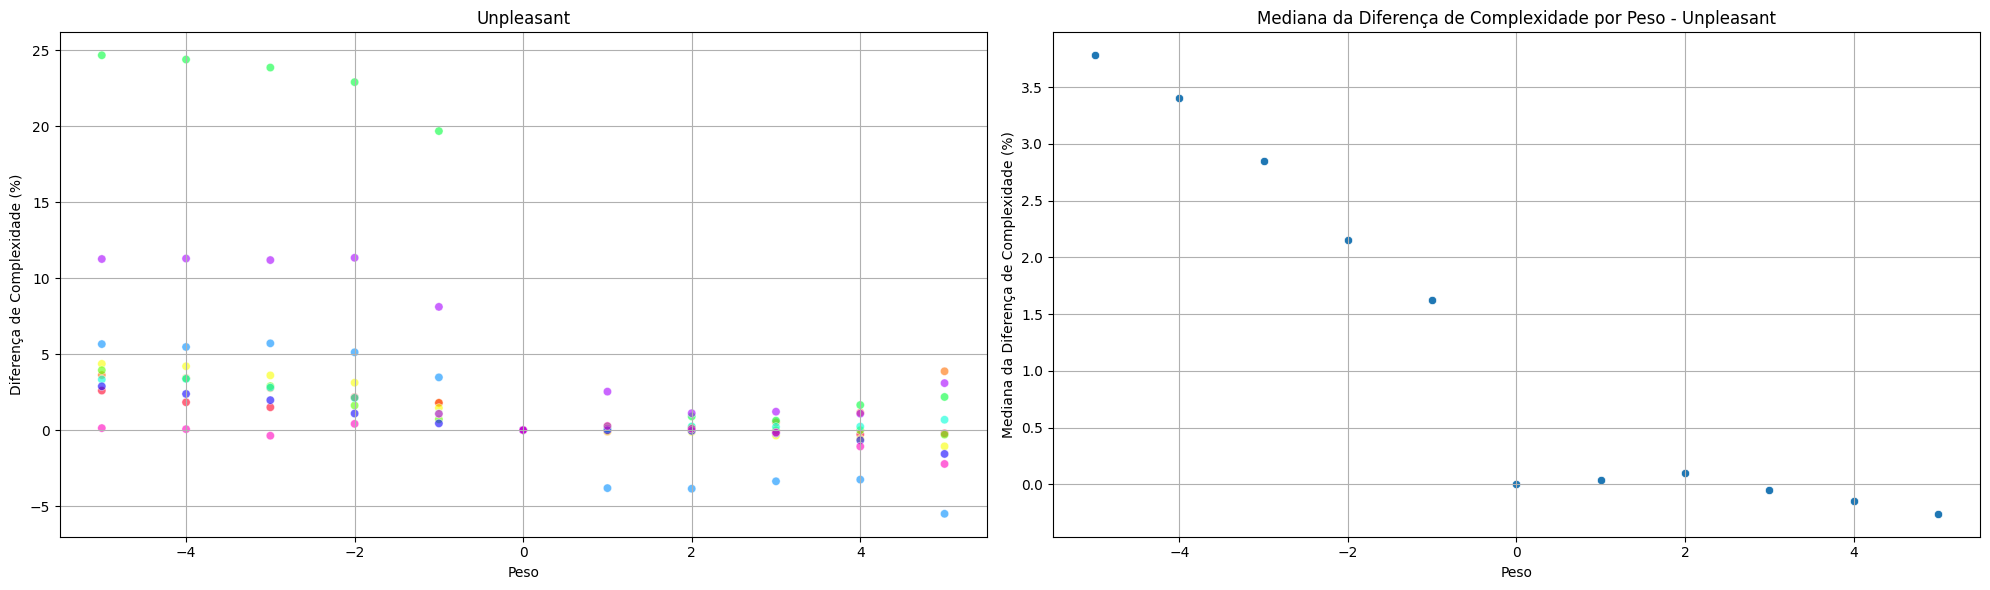

    weight  median_diff
0       -5        3.780
1       -4        3.405
2       -3        2.845
3       -2        2.155
4       -1        1.620
5        0        0.000
6        1        0.040
7        2        0.100
8        3       -0.050
9        4       -0.150
10       5       -0.260


In [11]:
median_diff = df2_t.groupby('weight')['diff'].median().reset_index()
median_diff.columns = ['weight', 'median_diff']

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=df2_t, x='weight', y='diff', hue='seed', alpha=0.6, palette='gist_rainbow', ax=axs[0], legend=False)
axs[0].set_title('Unpleasant')
axs[0].set_xlabel('Peso')
axs[0].set_ylabel('Diferença de Complexidade (%)')
axs[0].grid(True)

sns.scatterplot(data=median_diff, x='weight', y='median_diff', palette='viridis', ax=axs[1])
axs[1].set_title('Mediana da Diferença de Complexidade por Peso - Unpleasant')
axs[1].set_xlabel('Peso')
axs[1].set_ylabel('Mediana da Diferença de Complexidade (%)')
axs[1].grid(True)

plt.tight_layout()

plt.savefig('combined_plot.png', dpi=300)
plt.show()

print(median_diff)